In [379]:
%cd /mnt/xfs/home/krisgrg/projects/unlearning-with-trak/

/mnt/xfs/home/krisgrg/projects/unlearning-with-trak


In [380]:
%reload_ext autoreload
%autoreload 2

In [414]:
import numpy as np
import torch as ch
import matplotlib.pyplot as plt
from pathlib import Path

# Make and save forget sets for CIFAR-10

In [403]:
BASE_SAVE_PATH = Path("/mnt/xfs/projects/untrak/MATCHING/forget_set_inds/CIFAR10/")
BASE_SAVE_PATH.mkdir(exist_ok=True, parents=True)

Files already downloaded and verified


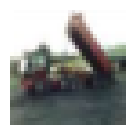

In [404]:
from unlearning.datasets.cifar10 import get_cifar_dataset
train_data = get_cifar_dataset(split="train", raw_imgs=True)

def plot_image(dataset, index):
    _, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(dataset[index][0])
    ax.axis('off')
    plt.show()

plot_image(train_data, 2)

In [427]:
PCs = np.stack(ch.load('/mnt/xfs/home/krisgrg/projects/unlearning-with-trak/data/cifar10_PC_inds.pt'))
PCs.shape

(10, 50000)

### Random samples

In [438]:
# forget set 1
np.random.seed(0)
forget_set_1 = np.sort(np.random.choice(50_000, 10, replace=False))
print(forget_set_1)
np.save(BASE_SAVE_PATH / "forget_set_1.npy", forget_set_1)

[11841 12363 19602 25747 26128 30346 31902 32490 42642 45519]


In [439]:
# forget set 2
np.random.seed(1)
forget_set_2 = np.sort(np.random.choice(50_000, 100, replace=False))
print(forget_set_2)
np.save(BASE_SAVE_PATH / "forget_set_2.npy", forget_set_2)

[  766  1281  1892  2206  2600  2908  2953  3197  3624  3991  4949  5763
  6072  6321  6756  7767  8038  8389  8590  9047  9613 10298 11314 11497
 11606 11751 11841 11912 12196 12561 13784 14674 14716 15073 15190 15299
 16668 16692 17501 18750 18783 19062 19298 19700 20642 20883 21375 22572
 23082 23784 24290 24580 24747 24776 24904 25261 25573 25607 25735 25816
 26247 26370 26652 26710 26772 27336 27558 27683 27939 29433 30620 31387
 31916 32563 32634 33430 34217 34590 35067 36256 36772 37941 39205 39319
 39508 39950 40301 40312 41309 41801 42250 43027 43113 43495 44174 45334
 45649 48140 48427 49928]


In [450]:
# forget set 3
np.random.seed(2)
forget_set_3 = np.sort(np.random.choice(50_000, 1000, replace=False))
print(forget_set_3.shape)
np.save(BASE_SAVE_PATH / "forget_set_3.npy", forget_set_3)

(1000,)


### Samples from PC1

In [441]:
PC1 = PCs[0]

In [443]:
forget_set_4 = np.sort(PC1[:10])
print(forget_set_4)
np.save(BASE_SAVE_PATH / "forget_set_4.npy", forget_set_4)

[ 3799  9235 22321 22908 23898 28510 29795 33079 45477 46715]


In [444]:
forget_set_5 = np.sort(PC1[:100])
print(forget_set_5)
np.save(BASE_SAVE_PATH / "forget_set_5.npy", forget_set_5)

[  305  1346  1538  2335  3799  4260  4956  5894  6873  7364  7398  7531
  7726  8050  9196  9235  9377  9665  9999 10221 10482 12132 12300 14355
 14667 15103 15602 16905 17306 17400 18014 18278 18512 18912 19222 19231
 19285 19606 21191 21480 21502 22321 22487 22749 22876 22908 23369 23385
 23898 23914 24637 25886 26388 28340 28510 28612 28726 28973 29242 29271
 29712 29795 30156 30523 31017 31129 31781 31875 33079 33735 34516 35932
 36319 36454 36871 37316 37471 37589 39645 39880 40004 40663 40800 42396
 42731 43209 44581 45278 45477 46146 46264 46715 47482 47716 47729 48169
 48980 49014 49316 49753]


In [449]:
forget_set_6 = np.sort(np.concatenate([PC1[:250], PC1[-250:]]))
print(forget_set_6.shape)
np.save(BASE_SAVE_PATH / "forget_set_6.npy", forget_set_6)

(500,)


### Samples from PC2

In [451]:
PC2 = PCs[1]

In [452]:
forget_set_7 = np.sort(PC2[:10])
print(forget_set_7)
np.save(BASE_SAVE_PATH / "forget_set_7.npy", forget_set_7)

[10231 11157 14072 21786 23868 33784 33982 36910 44380 47614]


In [453]:
forget_set_8 = np.sort(PC2[:100])
print(forget_set_8)
np.save(BASE_SAVE_PATH / "forget_set_8.npy", forget_set_8)

[ 1178  1322  1669  2157  2531  2714  2757  2845  2919  5018  5390  5562
  6006  7170  8743  9601 10038 10231 10717 10827 11157 11865 12563 12715
 12816 12950 12955 13000 13017 13577 13642 14072 14998 16213 16359 18968
 19517 20428 20827 21375 21571 21609 21786 22447 22718 23868 24987 26227
 27111 27340 27570 27581 27758 29186 29435 29700 29843 30566 30623 31654
 31772 31986 32070 32254 32605 33444 33637 33784 33982 34409 34665 35859
 36059 36910 37575 38357 38380 39427 39557 40349 40923 41504 41996 42123
 42422 43437 43635 44132 44380 44401 44479 44511 44860 45577 47076 47315
 47343 47614 49785 49971]


In [454]:
forget_set_9 = np.sort(np.concatenate([PC2[:250], PC2[-250:]]))
print(forget_set_9.shape)
np.save(BASE_SAVE_PATH / "forget_set_9.npy", forget_set_9)

(500,)
